In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("Processed Data/customers.csv")

In [3]:
df[["FirstOrderDate", "LastOrderDate"]] = df[["FirstOrderDate", "LastOrderDate"]].apply(pd.to_datetime)

In [75]:
lastdate = pd.to_datetime("2011-12-31", format="%Y-%m-%d")

In [ ]:

features = ['OrderCount', 'Duration','TotalValue', 'AvgQty', 'ValidOrders', 'AvgValue', 'IsWholesaler', 'IsRepeat', 'IsLoyal']
X = df[features]

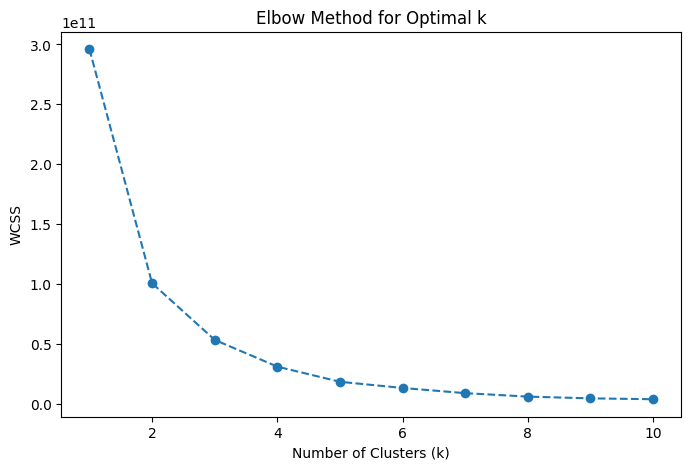

In [77]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range = range(1, 11) 

wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

clusters = df[['OrderCount', 'Duration', 'TotalValue', 'AvgQty', 'CancelledOrders', 'ValidOrders', 'AvgValue', 'IsWholesaler', 'IsRepeat', 'IsLoyal', 'Cluster']].groupby('Cluster').mean().reset_index()
clusters

,Cluster,OrderCount,Duration,TotalValue,AvgQty,CancelledOrders,ValidOrders,AvgValue,IsWholesaler,IsRepeat,IsLoyal
0,0,83.166590,4.291821,1347.934356,21.528332,1.740527,81.426063,27.252815,0.771488,0.118068,0.840111
1,1,956.333333,12.000000,241136.560000,146.367073,7.000000,949.333333,420.140475,1.000000,0.000000,1.000000
2,2,967.611111,11.166667,35694.129167,112.824064,25.777778,941.833333,181.418015,0.944444,0.000000,0.972222
3,3,2294.250000,11.250000,114451.897500,52.769318,105.250000,2189.000000,85.809389,1.000000,0.000000,1.000000


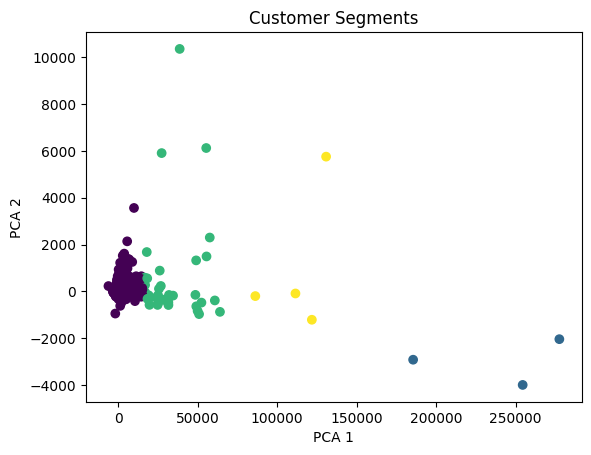

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments')
plt.show()

In [97]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.943409516954079


In [118]:
import plotly.express as px

fig = px.scatter_3d(clusters, x="ValidOrders", y="AvgValue", z="AvgQty", color='Cluster', text='Cluster', height=500)
fig.update_layout(margin=dict(l=10, r=20, t=0, b=20), showlegend=False)